In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from datetime import datetime

In [200]:
df = pd.read_csv('dataset-16d-14d.csv')
df.head()

,machine,time,axialAxisRmsVibration,radialAxisKurtosis,radialAxisPeakAcceleration,radialAxisRmsAcceleration,radialAxisRmsVibration,temperature
0,Blower-Pump-1,2024-08-12T12:00:00Z,0.771,3.282,0.67,0.160,1.084,54.1
1,Blower-Pump-1,2024-08-12T12:01:00Z,0.771,3.282,0.67,0.160,1.084,54.1
2,Blower-Pump-1,2024-08-12T12:02:00Z,0.771,3.282,0.67,0.160,1.084,54.1
3,Blower-Pump-1,2024-08-12T12:03:00Z,0.819,3.469,0.93,0.166,1.233,54.1
4,Blower-Pump-1,2024-08-12T12:04:00Z,0.819,3.469,0.93,0.166,1.233,54.1


In [201]:
df.shape

(2639, 8)

In [202]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
axialAxisRmsVibration,2639.0,0.868032,0.244732,0.164,0.782,0.819,0.8630,4.035
radialAxisKurtosis,2639.0,3.395983,1.289471,2.858,3.260,3.333,3.4210,32.624
radialAxisPeakAcceleration,2639.0,0.766738,0.169206,0.026,0.710,0.753,0.8010,4.000
radialAxisRmsAcceleration,2639.0,0.168261,0.009955,0.006,0.164,0.168,0.1700,0.282
radialAxisRmsVibration,2639.0,1.239585,0.209050,0.092,1.152,1.199,1.2575,2.821
temperature,2639.0,54.838992,0.485013,53.600,54.500,54.900,55.2000,55.800


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   machine                     2639 non-null   object 
 1   time                        2639 non-null   object 
 2   axialAxisRmsVibration       2639 non-null   float64
 3   radialAxisKurtosis          2639 non-null   float64
 4   radialAxisPeakAcceleration  2639 non-null   float64
 5   radialAxisRmsAcceleration   2639 non-null   float64
 6   radialAxisRmsVibration      2639 non-null   float64
 7   temperature                 2639 non-null   float64
dtypes: float64(6), object(2)
memory usage: 165.1+ KB


In [204]:
unix_list = []
for index in range(len(df)):
    date = str(df['time'][index]).split('.')[0].rstrip('Z')
    date_format = datetime.strptime(date, "%Y-%m-%dT%H:%M:%S")
    unix_time = datetime.timestamp(date_format)
    unix_list.append(unix_time)

df['unix'] = pd.Series(unix_list)

for index in range(len(df)):
    time = str(df.loc[index, 'time']).split('.')[0]
    if 'Z' not in time:
        time += 'Z'
    df.loc[index, 'time'] = time

df['time'] = pd.to_datetime(df['time'])

In [205]:
scaler = MinMaxScaler()

numerical_columns = []
for col in df.columns:
    if df[col].dtype == 'float64' and col != 'unix':
        numerical_columns.append(col)

scaled_df = df
scaled_df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [206]:
scaled_df.head()

,machine,time,axialAxisRmsVibration,radialAxisKurtosis,radialAxisPeakAcceleration,radialAxisRmsAcceleration,radialAxisRmsVibration,temperature,unix
0,Blower-Pump-1,2024-08-12 12:00:00+00:00,0.156807,0.014244,0.162053,0.557971,0.363503,0.227273,1.723453e+09
1,Blower-Pump-1,2024-08-12 12:01:00+00:00,0.156807,0.014244,0.162053,0.557971,0.363503,0.227273,1.723453e+09
2,Blower-Pump-1,2024-08-12 12:02:00+00:00,0.156807,0.014244,0.162053,0.557971,0.363503,0.227273,1.723453e+09
3,Blower-Pump-1,2024-08-12 12:03:00+00:00,0.169207,0.020527,0.227479,0.579710,0.418102,0.227273,1.723453e+09
4,Blower-Pump-1,2024-08-12 12:04:00+00:00,0.169207,0.020527,0.227479,0.579710,0.418102,0.227273,1.723453e+09


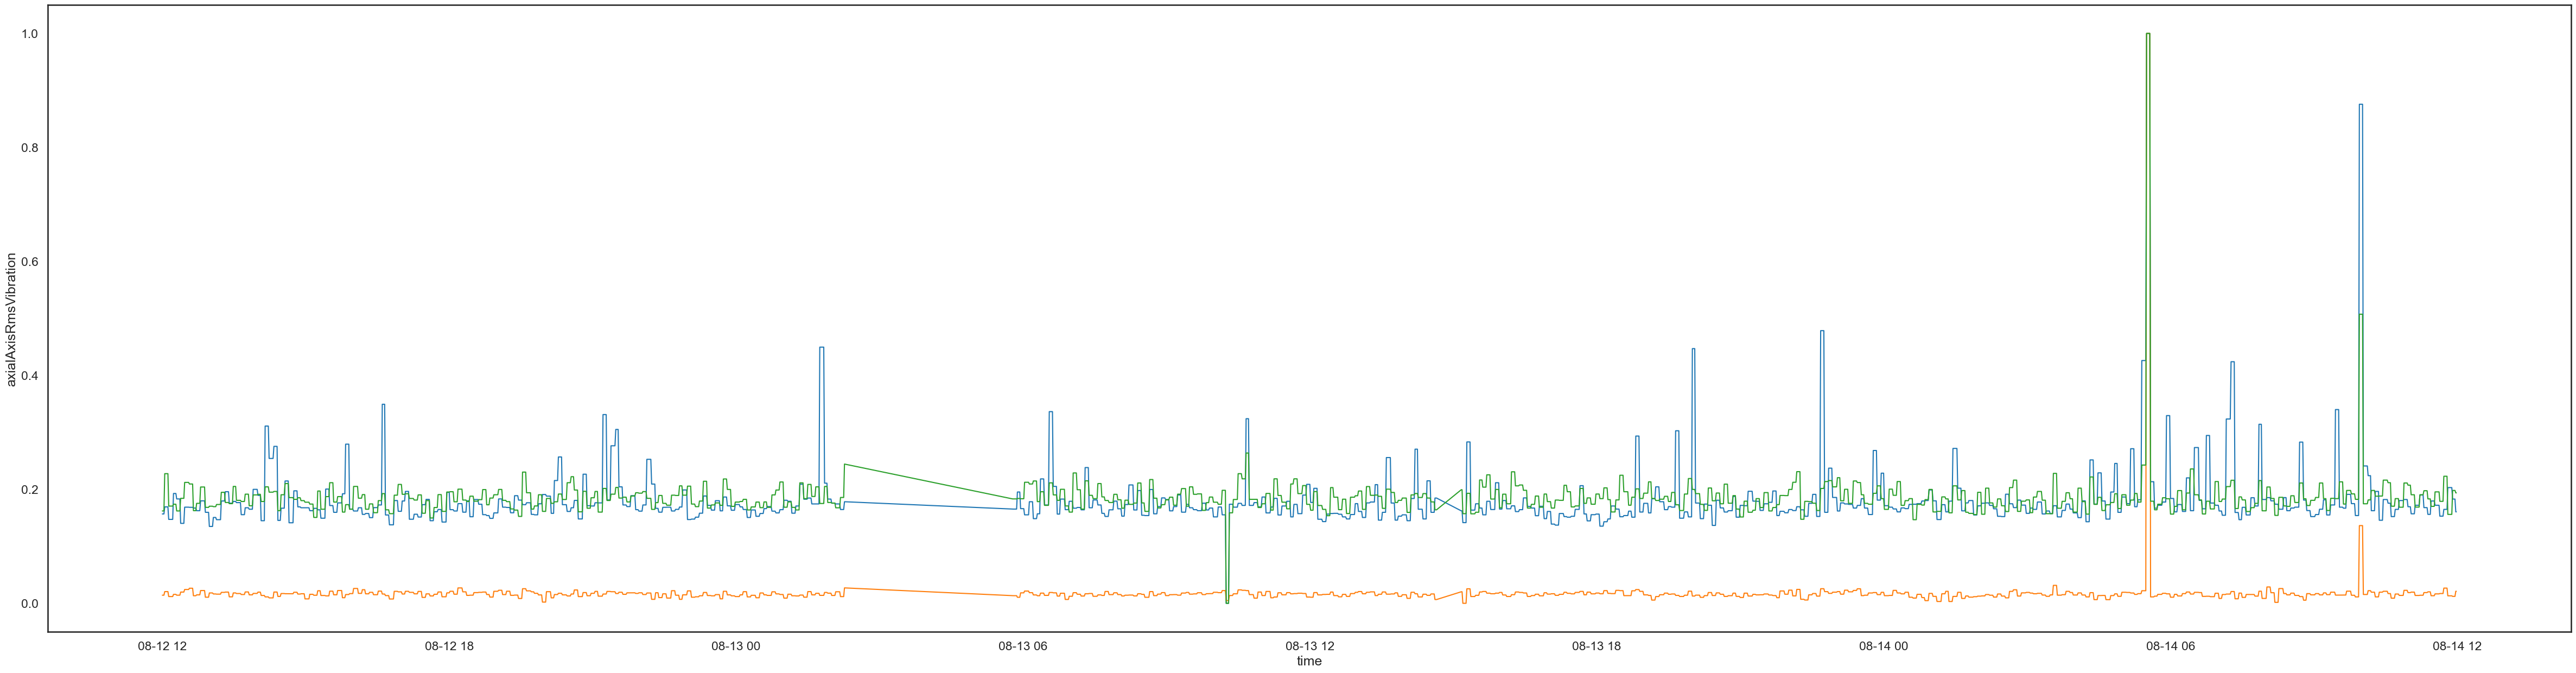

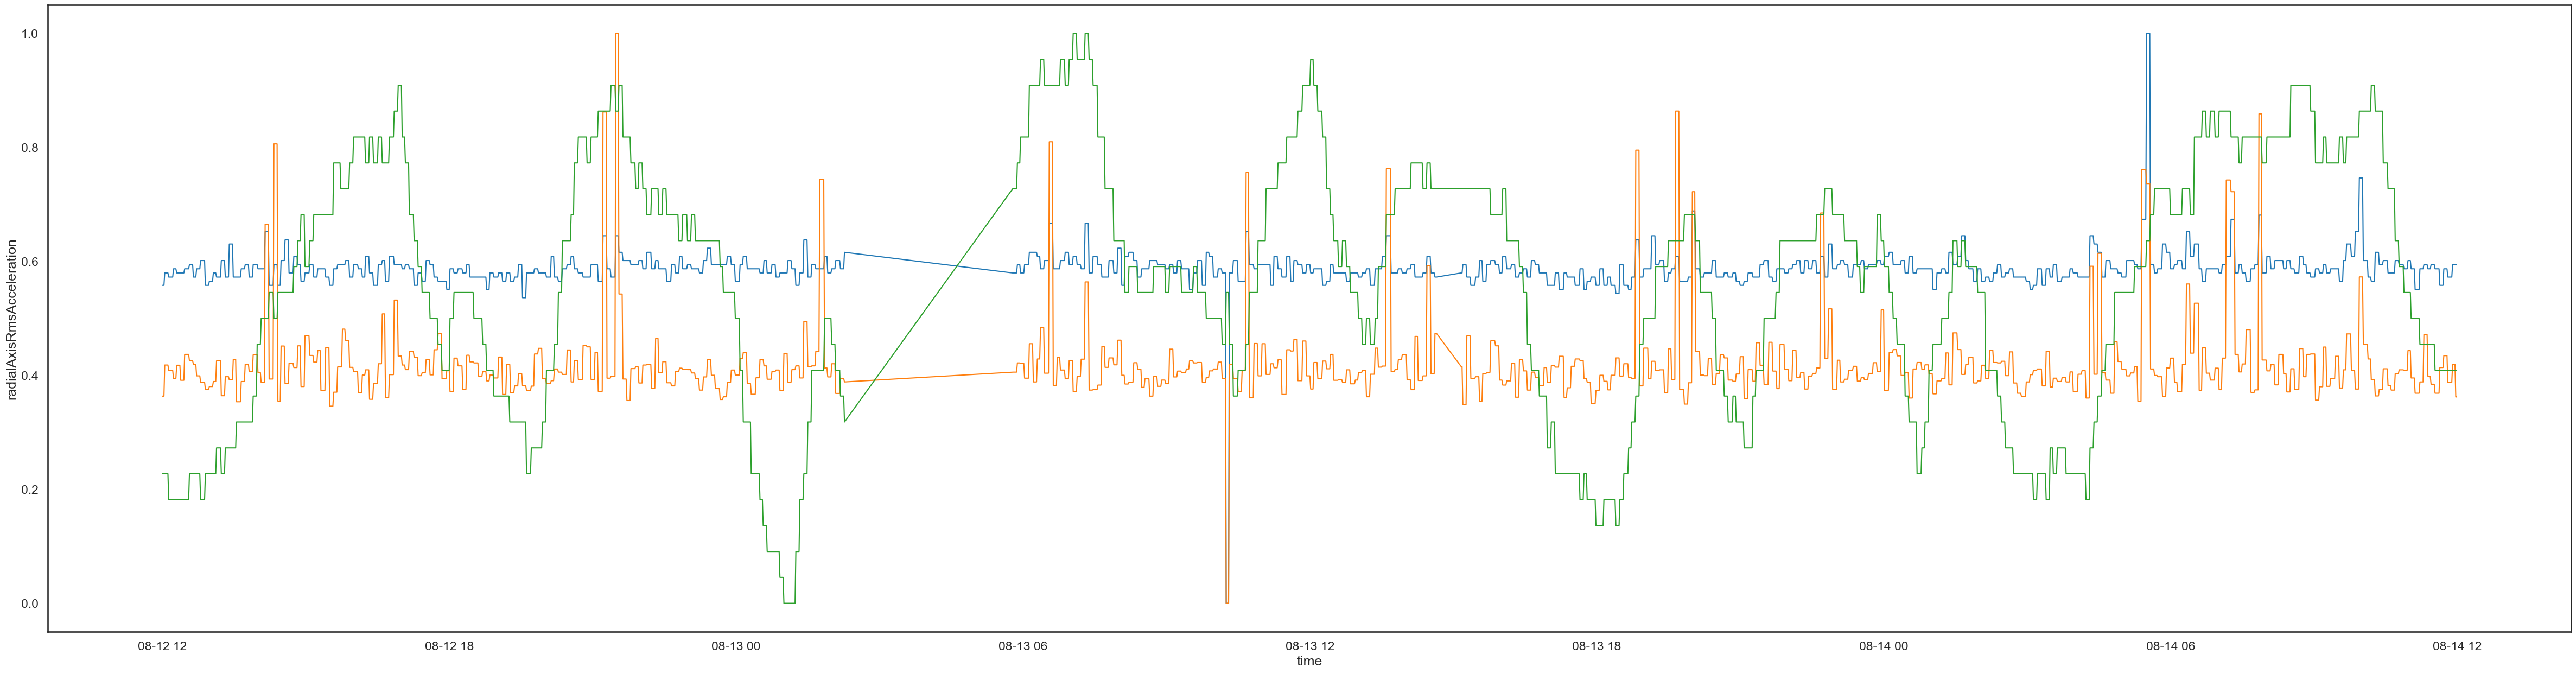

In [207]:
plt.figure(figsize=(60, 15))
for col in scaled_df.columns[:5]:
    if scaled_df[col].dtype == 'float64':
        if col != 'unix':
            sns.lineplot(data=scaled_df, x='time', y=col, legend='brief', linewidth=1.5)

plt.show()


plt.figure(figsize=(60, 15))
for col in scaled_df.columns[5:]:
    if scaled_df[col].dtype == 'float64':
        if col != 'unix':
            sns.lineplot(data=scaled_df, x='time', y=col, legend='full', linewidth=1.5)

plt.show()

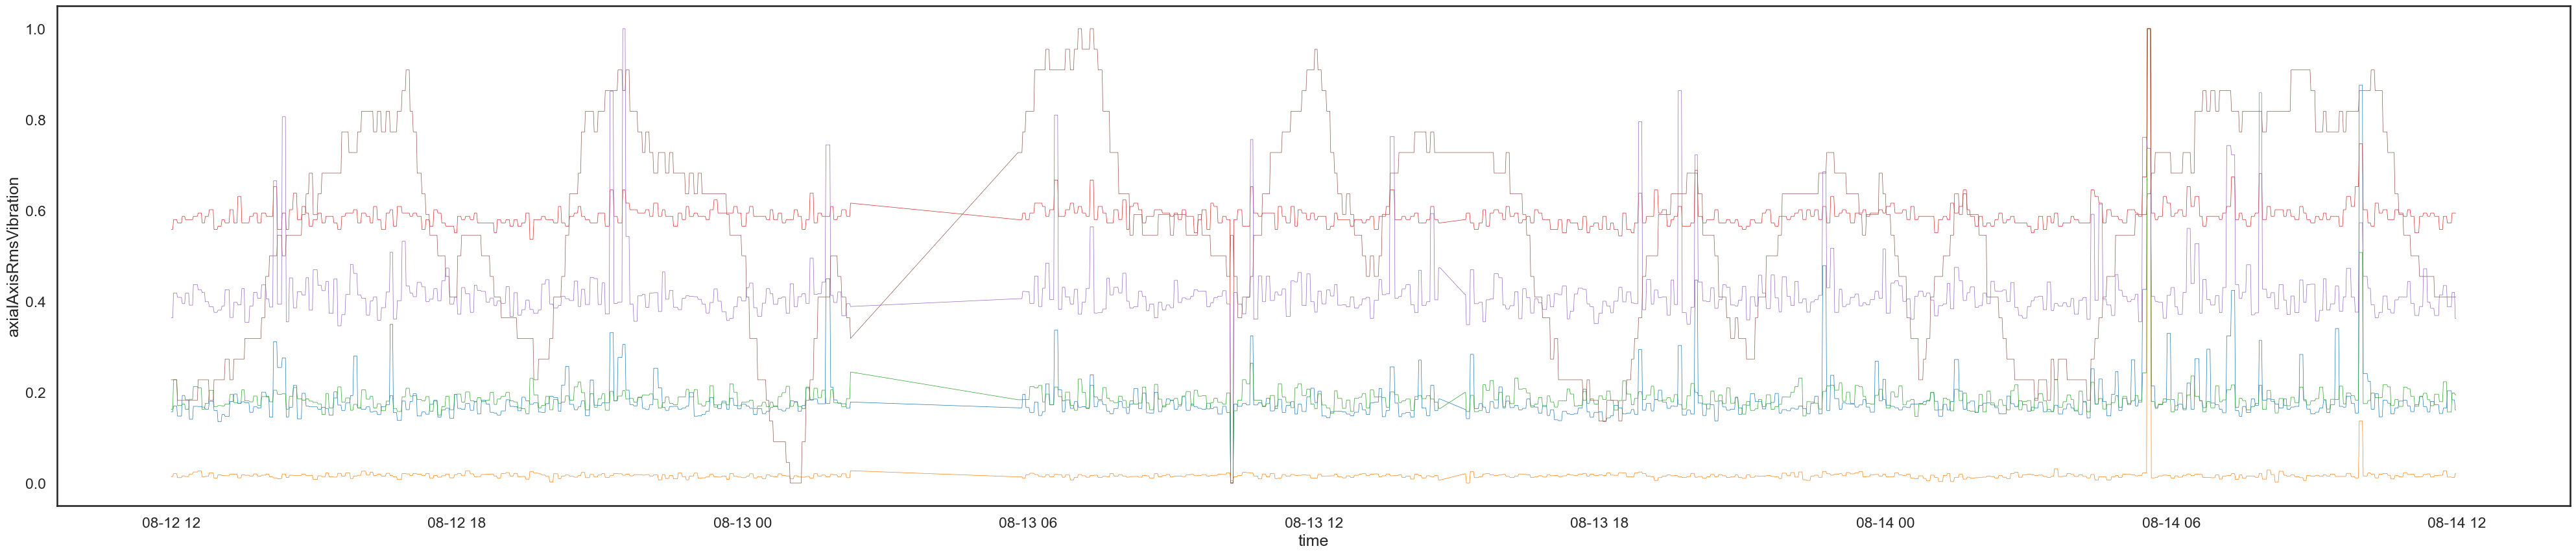

In [208]:
plt.figure(figsize=(50, 10))
for col in scaled_df.columns[:]:
    if scaled_df[col].dtype == 'float64':
        if col != 'unix':
            sns.lineplot(data=scaled_df, x='time', y=col, legend=True, linewidth=0.5)
plt.show()

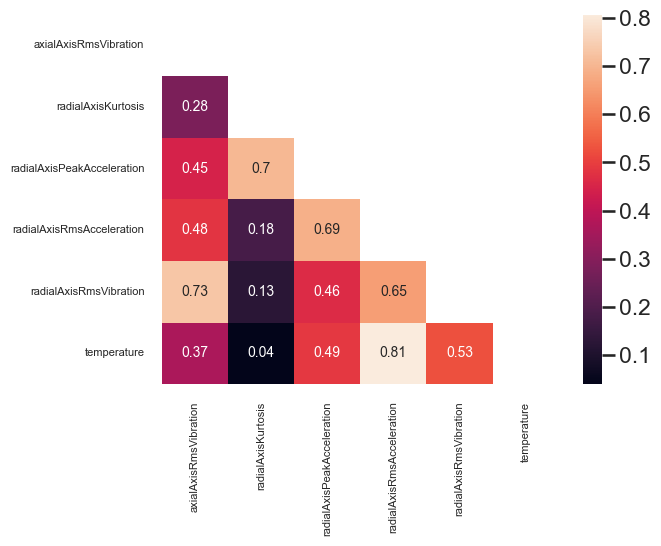

In [155]:
mask = np.zeros_like(df[numerical_columns].corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure()
sns.heatmap(df[numerical_columns].corr(), mask = mask, annot = True, annot_kws = {"size":10})
sns.set_style("white")
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

<Figure size 640x480 with 0 Axes>

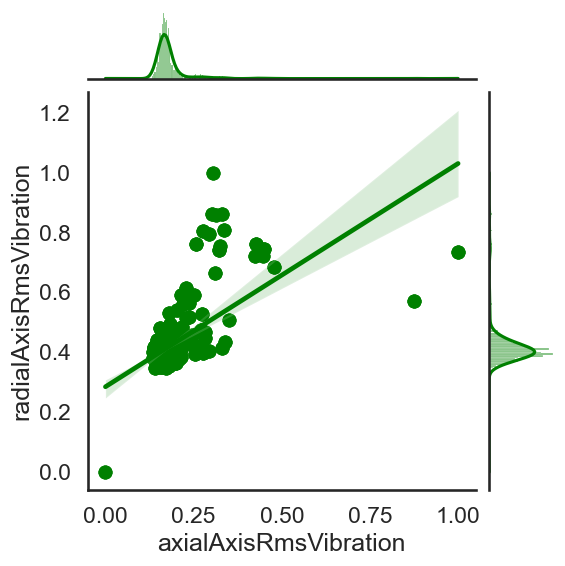

In [169]:
plt.figure()
sns.set_context('talk')
sns.jointplot(data=df, x='axialAxisRmsVibration', y='radialAxisRmsVibration', color='green', kind='reg')
plt.show()

In [171]:
df['radialAxisRmsVibration'].corr(df['axialAxisRmsVibration'])

0.6157746264410519

<Figure size 640x480 with 0 Axes>

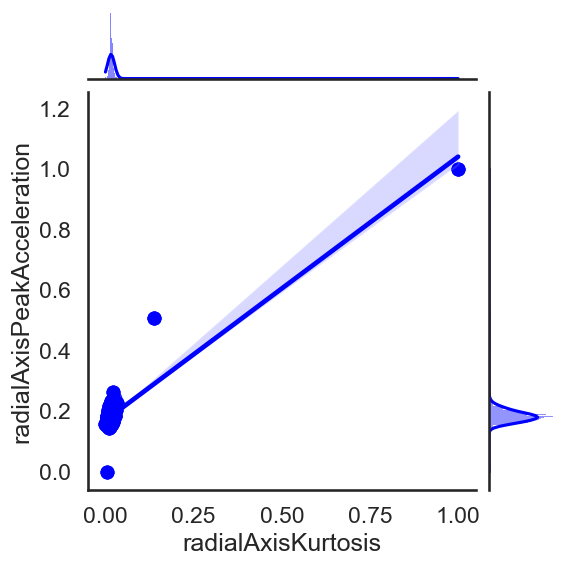

In [167]:
plt.figure()
sns.set_context('talk')
sns.jointplot(data=df, x='radialAxisKurtosis', y='radialAxisPeakAcceleration', color='blue', kind='reg')
plt.show()

<Figure size 640x480 with 0 Axes>

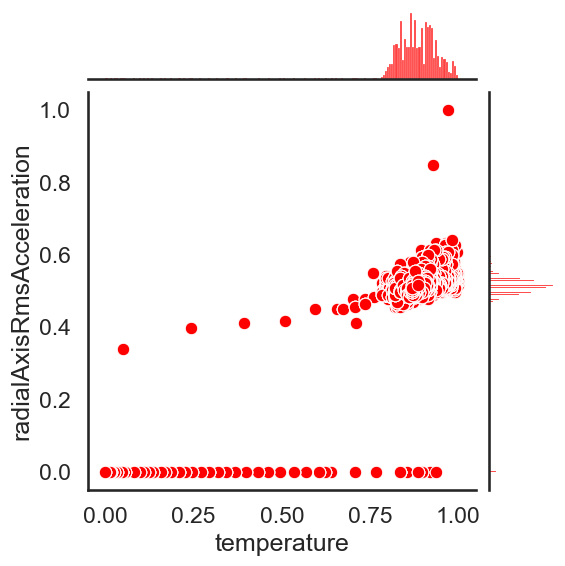

In [37]:
plt.figure()
sns.set_context('talk')
sns.jointplot(data=df, x='temperature', y='radialAxisRmsAcceleration', color='red', kind='scatter')
plt.show()